In this notebook, we perform some exploratory data analysis.

See <a href="https://docs.google.com/document/d/1MDKqtuiMJgI825MwL7AHRbN92E5kdDWzO5WiqwCGklg/edit?usp=sharing">here</a> for a written summary

### Importing packages and preparing data

In [1]:
#Importing packages

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
#importing the data
data= pd.read_csv("clean_data.csv")

We need to train-test split our data before we analyze it.  

In [3]:
train, test = train_test_split(data,
                              test_size=0.1,
                              stratify=data["default payment next month"],
                              shuffle=True,
                              random_state=123)

### Looking at the classification data

First, let's try to use the classification data to see if any interesting patterns appear.

These are sex, education, and marriage.

#### Sex

We recall that male is 1 and female is 2

In [10]:
train.groupby(['SEX'])['default payment next month'].mean()

SEX
1    0.242800
2    0.206933
Name: default payment next month, dtype: float64

#### Marital Status

Recall that 1 is married, 2 is single, and 3 is other

In [11]:
train.groupby(['MARRIAGE'])['default payment next month'].mean()

MARRIAGE
0    0.081633
1    0.233864
2    0.209881
3    0.265101
Name: default payment next month, dtype: float64

In [39]:
train['MARRIAGE'].value_counts()

2    14351
1    12302
3      298
0       49
Name: MARRIAGE, dtype: int64

#### Education

Recall that 1 is graduate school, 2 is university, 3 is high school, and 4 is other

In [12]:
train.groupby(['EDUCATION'])['default payment next month'].mean()

EDUCATION
0    0.000000
1    0.191947
2    0.238835
3    0.248753
4    0.053571
5    0.051181
6    0.163265
Name: default payment next month, dtype: float64

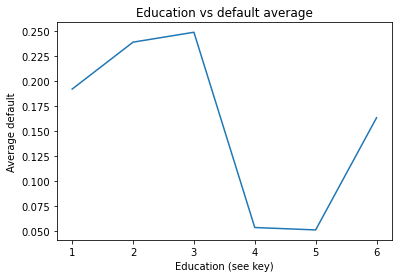

In [38]:
plt.plot(range(1,7),
        train.groupby(['EDUCATION'])['default payment next month'].mean()[1:])

plt.title("Education vs default average")
plt.xlabel("Education (see key)")
plt.ylabel("Average default")

plt.show()

There seems to be a difference based on education.  But maybe those differences are because the cateories are unequal.

In [63]:
train['EDUCATION'].value_counts()

2    12674
1     9487
3     4410
5      254
4      112
6       49
0       14
Name: EDUCATION, dtype: int64

#### Age

First, we'll just plot age against average default

In [17]:
by_age=train.groupby(['AGE'])['default payment next month'].mean()

In [41]:
by_age=by_age.drop([79])

In [42]:
by_age.loc[76] =0
by_age.loc[77]=0
by_age.loc[78]=0
by_age.loc[79]=0

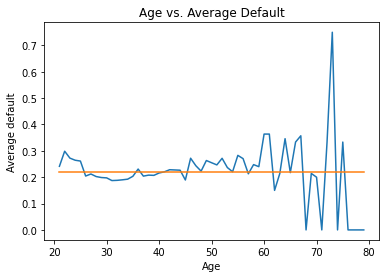

In [53]:
plt.plot( range(21,80),
    by_age)

plt.plot([21,79],
        [train['default payment next month'].mean(),train['default payment next month'].mean()])

plt.title("Age vs. Average Default")
plt.xlabel("Age")
plt.ylabel("Average default")

plt.show()

I don't really see an obvious trend here, it gets more unstable as you get older.  Maybe there's a condition like age AND something else that makes you less likely to default.

In [56]:
train.value_counts('AGE')

AGE
29    1439
27    1315
28    1279
30    1261
26    1130
31    1116
25    1083
32    1042
34    1039
33    1026
24    1006
36     996
35     978
37     926
39     860
38     837
23     837
40     787
41     735
42     727
44     640
43     611
45     549
46     511
22     509
47     460
48     417
49     414
50     357
51     300
53     300
52     276
54     222
55     198
56     159
58     113
57     108
59      75
21      58
60      55
61      55
62      40
63      28
64      26
65      23
66      21
67      14
69      14
70      10
73       4
75       3
68       3
72       3
71       3
74       1
79       1
dtype: int64

Oh, there just isn't enough data as you get older.

What happens if we group age by 5's?  This might help balance the lack of data for older age groups.

In [15]:
#create a new column that indicates which group of 5 they're in
by_age_5 = []
for i in range(len(train)):
    for j in range(12):
        if train.iloc[i]['AGE'] in range(20+5*j+1, 26+5*j):
            by_age_5.append(j)

train['by_age_5']=by_age_5

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/645481454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['by_age_5']=by_age_5


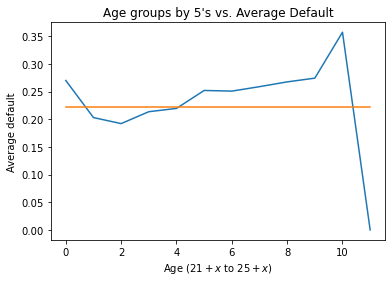

In [18]:
#Plotting this new data
plt.plot( range(12),
    train.groupby(['by_age_5'])['default payment next month'].mean())

plt.plot([0,11],
        [train['default payment next month'].mean(),train['default payment next month'].mean()])

plt.title("Age groups by 5's vs. Average Default")
plt.xlabel("Age ($21+x$ to $25+x$)")
plt.ylabel("Average default")

plt.show()

What happens if we group age by 10's?

In [30]:
#create a new column that indicates which group of 10 they're in
by_age_10 = []
for i in range(len(train)):
    for j in range(8):
        if train.iloc[i]['AGE'] in range(19+10*j+1, 30+10*j):
            by_age_10.append(j)

train['by_age_10']=by_age_10

C:\Users\sheri\AppData\Local\Temp/ipykernel_16104/3960424258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['by_age_10']=by_age_10


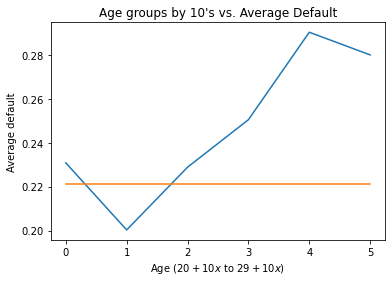

In [33]:
#Plotting this new data
plt.plot( range(6),
    train.groupby(['by_age_10'])['default payment next month'].mean())

#plot the average overall for comparison
plt.plot([0,5],
        [train['default payment next month'].mean(),train['default payment next month'].mean()])

#labeling the graph
plt.title("Age groups by 10's vs. Average Default")
plt.xlabel("Age ($20+10x$ to $29+10x$)")
plt.ylabel("Average default")

plt.show()

### Payment History

First, let's do average of payment history vs default.  

In [4]:
def average(L):
    '''takes in a non-empty list of numbers and outputs the average of those numbers'''
    sum=0
    for item in L:
        sum=sum +item
    return(sum/len(L))

In [5]:
newcol = []
for i in range(len(train)):
    newcol.append(average([train.iloc[i]['PAY_0'],
                  train.iloc[i]['PAY_2'],
                  train.iloc[i]['PAY_3'],
                  train.iloc[i]['PAY_4'],
                  train.iloc[i]['PAY_5'],
                  train.iloc[i]['PAY_6']]))
    
#OMG there is no PAY_1 column!
    
train['average_pay_hist']= newcol

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/3645501999.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['average_pay_hist']= newcol


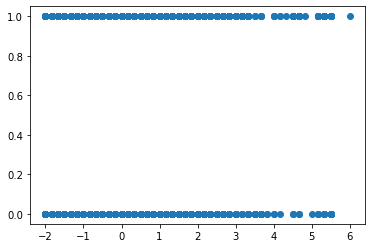

In [163]:
plt.scatter(train['average_pay_hist'],
           train['default payment next month'])


plt.show()

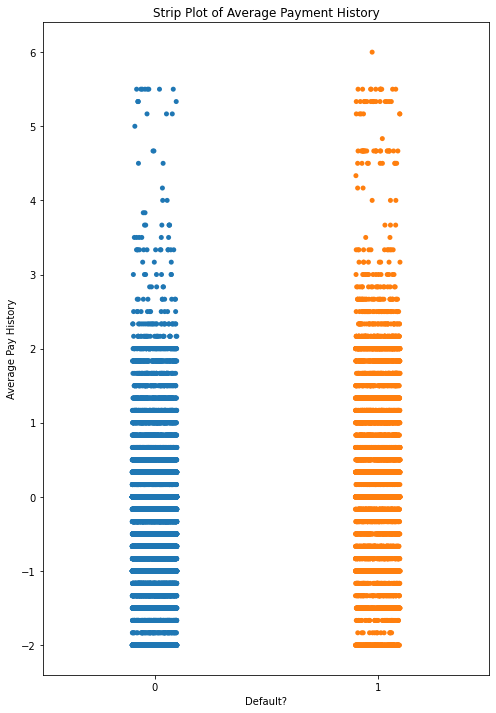

In [164]:
plt.figure(figsize=(8, 12))

sns.stripplot(data=train,
              x="default payment next month", 
              y="average_pay_hist"
             )



plt.title('Strip Plot of Average Payment History')

plt.xlabel('Default?')
plt.ylabel('Average Pay History')

plt.show()

yeah, there's no obvious pattern there

In [98]:
train.groupby(['default payment next month'])['average_pay_hist'].mean()

default payment next month
0   -0.328633
1    0.347706
Name: average_pay_hist, dtype: float64

OH, but that IS a big difference there!

In [99]:
train.groupby(['default payment next month'])['PAY_6'].mean()

default payment next month
0   -0.403082
1    0.120563
Name: PAY_6, dtype: float64

In [46]:
train.groupby(['PAY_6'])['default payment next month'].mean()

PAY_6
-2    0.197815
-1    0.171562
 0    0.188377
 2    0.505793
 3    0.636364
 4    0.604651
 5    0.538462
 6    0.705882
 7    0.844444
 8    1.000000
Name: default payment next month, dtype: float64

In [100]:
train.groupby(['default payment next month'])['PAY_5'].mean()

default payment next month
0   -0.385914
1    0.177495
Name: PAY_5, dtype: float64

In [47]:
train.groupby(['PAY_5'])['default payment next month'].mean()

PAY_5
-2    0.195856
-1    0.162205
 0    0.188242
 2    0.541946
 3    0.621118
 4    0.600000
 5    0.500000
 6    0.666667
 7    0.839286
 8    1.000000
Name: default payment next month, dtype: float64

In [102]:
train.groupby(['default payment next month'])['PAY_4'].mean()

default payment next month
0   -0.354432
1    0.264735
Name: PAY_4, dtype: float64

In [48]:
train.groupby(['PAY_4'])['default payment next month'].mean()

PAY_4
-2    0.192861
-1    0.157823
 0    0.182616
 1    0.500000
 2    0.526685
 3    0.609756
 4    0.646154
 5    0.500000
 6    0.250000
 7    0.839286
 8    0.500000
Name: default payment next month, dtype: float64

In [103]:
train.groupby(['default payment next month'])['PAY_3'].mean()

default payment next month
0   -0.316530
1    0.374749
Name: PAY_3, dtype: float64

In [49]:
train.groupby(['PAY_3'])['default payment next month'].mean()

PAY_3
-2    0.185730
-1    0.153285
 0    0.173907
 1    0.333333
 2    0.520640
 3    0.570776
 4    0.563380
 5    0.550000
 6    0.590909
 7    0.814815
 8    0.666667
Name: default payment next month, dtype: float64

In [104]:
train.groupby(['default payment next month'])['PAY_2'].mean()

default payment next month
0   -0.301027
1    0.473208
Name: PAY_2, dtype: float64

In [50]:
train.groupby(['PAY_2'])['default payment next month'].mean()

PAY_2
-2    0.183470
-1    0.157138
 0    0.157917
 1    0.185185
 2    0.559584
 3    0.627907
 4    0.471910
 5    0.583333
 6    0.750000
 7    0.600000
 8    0.000000
Name: default payment next month, dtype: float64

In [101]:
train.groupby(['default payment next month'])['PAY_0'].mean()

default payment next month
0   -0.210814
1    0.675486
Name: PAY_0, dtype: float64

In [51]:
train.groupby(['PAY_0'])['default payment next month'].mean()

PAY_0
-2    0.132719
-1    0.164674
 0    0.128358
 1    0.342556
 2    0.689482
 3    0.757475
 4    0.685714
 5    0.434783
 6    0.500000
 7    0.777778
 8    0.578947
Name: default payment next month, dtype: float64

In [53]:
train['PAY_6'].value_counts()

 0    14678
-1     5141
-2     4393
 2     2503
 3      165
 7       45
 4       43
 6       17
 5       13
 8        2
Name: PAY_6, dtype: int64

In [57]:
train.groupby(['default payment next month'])['PAY_0'].mean()[0]

-0.21081415255849345

So the more recent payment history seems like a better indicator

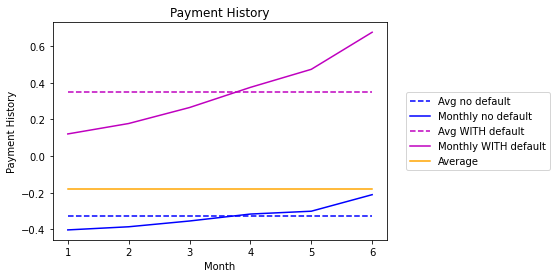

In [82]:
#Creating values
average_no_default = train.groupby(['default payment next month'])['average_pay_hist'].mean()[0]
average_yes_default= train.groupby(['default payment next month'])['average_pay_hist'].mean()[1]

no_default = [train.groupby(['default payment next month'])['PAY_6'].mean()[0],
              train.groupby(['default payment next month'])['PAY_5'].mean()[0],
              train.groupby(['default payment next month'])['PAY_4'].mean()[0],
              train.groupby(['default payment next month'])['PAY_3'].mean()[0],
              train.groupby(['default payment next month'])['PAY_2'].mean()[0],
              train.groupby(['default payment next month'])['PAY_0'].mean()[0],
             ]

yes_default = [train.groupby(['default payment next month'])['PAY_6'].mean()[1],
              train.groupby(['default payment next month'])['PAY_5'].mean()[1],
              train.groupby(['default payment next month'])['PAY_4'].mean()[1],
              train.groupby(['default payment next month'])['PAY_3'].mean()[1],
              train.groupby(['default payment next month'])['PAY_2'].mean()[1],
              train.groupby(['default payment next month'])['PAY_0'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,6],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,7),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,6],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,7),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,6],
        [train['average_pay_hist'].mean(), train['average_pay_hist'].mean()],
         color='orange',
         label="Average"
        )

#Labeling the graphs
plt.title("Payment History")
plt.xlabel("Month")
plt.ylabel("Payment History")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

Instead of taking the average history, what if we count the number of times they don't pay duly?

In [167]:
#Making new columns
train['pay_hist_binary']=0

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/1062679121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pay_hist_binary']=0


In [185]:
train.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p4/b5_2,p5/b6_2,average_pay/bill_3,p1/b2_3,p2/b3_3,p3/b4_3,p4/b5_3,p5/b6_3,average_bill_amt,pay_hist_binary
28731,28732,240000,2,2,1,35,-1,2,-1,-1,...,1.0,1.0,0.8,0.0,1.0,1.0,1.0,1.0,333.0,0


In [184]:
train.iloc[0]['pay_hist_binary']=1

In [192]:
newcol=[]
for i in range(len(train)):
    counter=0
    if train.iloc[i]['PAY_0'] >0:
        counter = counter+1
    if train.iloc[i]['PAY_2'] >0:
        counter = counter+1
    if train.iloc[i]['PAY_3'] >0:
        counter = counter+1
    if train.iloc[i]['PAY_4'] >0:
        counter = counter+1
    if train.iloc[i]['PAY_5'] >0:
        counter = counter+1
    if train.iloc[i]['PAY_6'] >0:
        counter = counter+1
    newcol.append(counter)
train['pay_hist_binary']=newcol

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/1582052598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pay_hist_binary']=newcol


In [193]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p4/b5_2,p5/b6_2,average_pay/bill_3,p1/b2_3,p2/b3_3,p3/b4_3,p4/b5_3,p5/b6_3,average_bill_amt,pay_hist_binary
28731,28732,240000,2,2,1,35,-1,2,-1,-1,...,1.000000,1.000000,0.800000,0.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1
23226,23227,280000,2,2,1,39,0,0,0,0,...,0.020002,0.020002,0.164766,0.032424,0.541781,0.209620,0.020002,0.020002,252829.333333,0
2055,2056,130000,1,3,1,46,1,2,0,0,...,0.052723,0.071968,0.050225,0.003853,0.079542,0.043039,0.052723,0.071968,21348.166667,2
15313,15314,80000,2,3,1,39,0,0,0,0,...,0.044356,0.043139,0.056999,0.070462,0.064698,0.062343,0.044356,0.043139,21198.333333,0
18683,18684,200000,2,1,2,27,1,-2,-2,-2,...,1.000000,0.002979,0.800596,1.000000,1.000000,1.000000,1.000000,0.002979,1005.500000,1


In [196]:
train.groupby(['default payment next month'])['pay_hist_binary'].mean()

default payment next month
0    0.505136
1    2.014066
Name: pay_hist_binary, dtype: float64

In [197]:
train.groupby(['default payment next month'])['pay_hist_binary'].value_counts()

default payment next month  pay_hist_binary
0                           0                  15846
                            1                   2783
                            2                   1051
                            3                    502
                            6                    370
                            4                    369
                            5                    107
1                           0                   2082
                            1                   1186
                            6                    861
                            2                    660
                            3                    532
                            4                    495
                            5                    156
Name: pay_hist_binary, dtype: int64

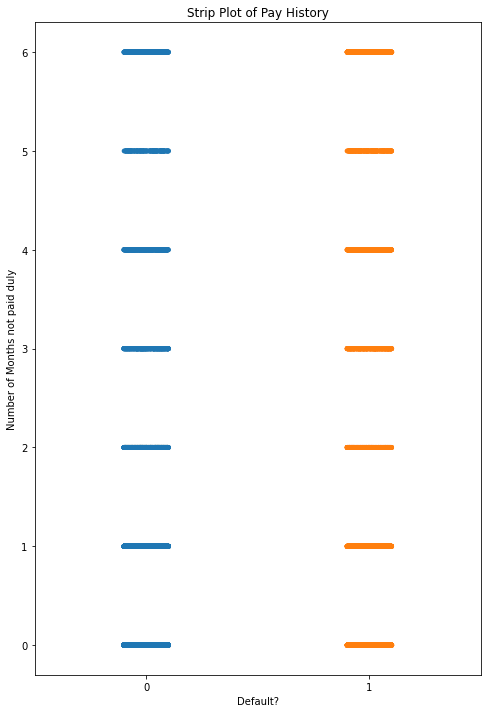

In [194]:
plt.figure(figsize=(8, 12))

sns.stripplot(data=train,
              x="default payment next month", 
              y="pay_hist_binary"
             )

plt.title('Strip Plot of Pay History')

plt.xlabel('Default?')
plt.ylabel('Number of Months not paid duly')

plt.show()

### Payment Amount

In [5]:
newcol = []
for i in range(len(train)):
    newcol.append(average([train.iloc[i]['PAY_AMT1'],
                  train.iloc[i]['PAY_AMT2'],
                  train.iloc[i]['PAY_AMT3'],
                  train.iloc[i]['PAY_AMT4'],
                  train.iloc[i]['PAY_AMT5'],
                  train.iloc[i]['PAY_AMT6']]))
    
#OMG there is no PAY_1 column!
    
train['average_pay_amt_hist']= newcol

C:\Users\sheri\AppData\Local\Temp/ipykernel_18980/3689884597.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['average_pay_amt_hist']= newcol


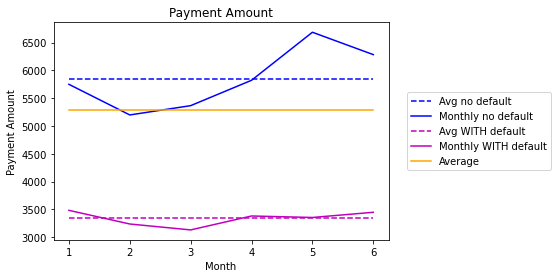

In [85]:
#Creating values
average_no_default = train.groupby(['default payment next month'])['average_pay_amt_hist'].mean()[0]
average_yes_default= train.groupby(['default payment next month'])['average_pay_amt_hist'].mean()[1]

no_default = [train.groupby(['default payment next month'])['PAY_AMT6'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT5'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT4'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT3'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT2'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT1'].mean()[0],
             ]

yes_default = [train.groupby(['default payment next month'])['PAY_AMT6'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT5'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT4'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT3'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT2'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT1'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,6],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,7),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,6],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,7),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,6],
        [train['average_pay_amt_hist'].mean(), train['average_pay_amt_hist'].mean()],
         color='orange',
         label="Average"
        )

#Labeling the graphs
plt.title("Payment Amount")
plt.xlabel("Month")
plt.ylabel("Payment Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

### Bill Amount

In [157]:
newcol = []
for i in range(len(train)):
    newcol.append(average([train.iloc[i]['BILL_AMT1'],
                  train.iloc[i]['BILL_AMT2'],
                  train.iloc[i]['BILL_AMT3'],
                  train.iloc[i]['BILL_AMT4'],
                  train.iloc[i]['BILL_AMT5'],
                  train.iloc[i]['BILL_AMT6']]))
    
#OMG there is no PAY_1 column!
    
train['average_bill_amt']= newcol

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/2404048375.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['average_bill_amt']= newcol


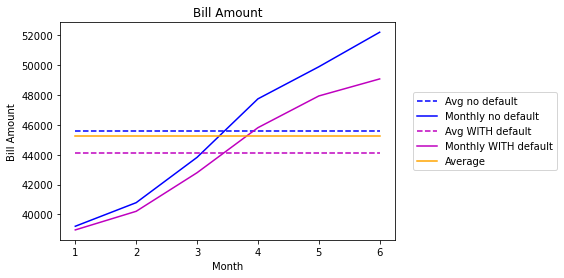

In [87]:
#Creating values
average_no_default = train.groupby(['default payment next month'])['average_bill_amt'].mean()[0]
average_yes_default= train.groupby(['default payment next month'])['average_bill_amt'].mean()[1]

no_default = [train.groupby(['default payment next month'])['BILL_AMT6'].mean()[0],
              train.groupby(['default payment next month'])['BILL_AMT5'].mean()[0],
              train.groupby(['default payment next month'])['BILL_AMT4'].mean()[0],
              train.groupby(['default payment next month'])['BILL_AMT3'].mean()[0],
              train.groupby(['default payment next month'])['BILL_AMT2'].mean()[0],
              train.groupby(['default payment next month'])['BILL_AMT1'].mean()[0],
             ]

yes_default = [train.groupby(['default payment next month'])['BILL_AMT6'].mean()[1],
              train.groupby(['default payment next month'])['BILL_AMT5'].mean()[1],
              train.groupby(['default payment next month'])['BILL_AMT4'].mean()[1],
              train.groupby(['default payment next month'])['BILL_AMT3'].mean()[1],
              train.groupby(['default payment next month'])['BILL_AMT2'].mean()[1],
              train.groupby(['default payment next month'])['BILL_AMT1'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,6],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,7),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,6],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,7),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,6],
        [train['average_bill_amt'].mean(), train['average_bill_amt'].mean()],
         color='orange',
         label="Average"
        )

#Labeling the graphs
plt.title("Bill Amount")
plt.xlabel("Month")
plt.ylabel("Bill Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

### Payment/Bill

In [88]:
train['average_pay/bill']=0
train['p1/b2']=0
train['p2/b3']=0
train['p3/b4']=0
train['p4/b5']=0
train['p5/b6']=0
for i in range(len(train)):
    
    B1=train.iloc[i]['BILL_AMT1']
    B2=train.iloc[i]['BILL_AMT2']
    B3=train.iloc[i]['BILL_AMT3']
    B4=train.iloc[i]['BILL_AMT4']
    B5=train.iloc[i]['BILL_AMT5']
    B6=train.iloc[i]['BILL_AMT6']
    
    P1=train.iloc[i]['PAY_AMT1']
    P2=train.iloc[i]['PAY_AMT2']
    P3=train.iloc[i]['PAY_AMT3']
    P4=train.iloc[i]['PAY_AMT4']
    P5=train.iloc[i]['PAY_AMT5']
    P6=train.iloc[i]['PAY_AMT6']
    
    #This first group is irrelevant
    if B1 == 0:
        B1=1
        if P1==0:
            P1=1
    
    if B2 == 0:
        B2=1
        if P1==0:
            P1=1
            
    if B3 == 0:
        B3=1
        if P2==0:
            P2=1
    
    if B4 == 0:
        B4=1
        if P3==0:
            P4=1
            
    if B5 == 0:
        B5=1
        if P4==0:
            P4=1
            
    if B6 == 0:
        B6=1
        if P5==0:
            P5=1

    newcol.append(average([P1/B2,
                  P2/B3,
                  P3/B4,
                  P4/B5,
                  P5/B6
                  ]))
    train['average_pay/bill'].iloc[i]=average([P1/B2,
                  P2/B3,
                  P3/B4,
                  P4/B5,
                  P5/B6
                  ])
    train['p1/b2'].iloc[i]=P1/B2
    train['p2/b3'].iloc[i]=P2/B3
    train['p3/b4'].iloc[i]=P3/B4
    train['p4/b5'].iloc[i]=P4/B5
    train['p5/b6'].iloc[i]=P5/B6
    


C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/4078706046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['average_pay/bill']=0
C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/4078706046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['p1/b2']=0
C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/4078706046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [90]:
train[['p1/b2','BILL_AMT5','average_pay/bill']].sample(10)

,p1/b2,BILL_AMT5,average_pay/bill
11050,-0.000000,-43,0.200907
29918,0.046458,112211,0.040966
26949,-0.000000,225614,0.248387
23893,0.036805,451040,0.035902
12372,0.042128,80625,0.038343
10617,1.000000,197914,0.228900
20167,1.000000,0,1.000000
7629,0.345697,19364,0.287917
15188,0.154907,25546,0.260222
19714,-0.000000,3875,0.453906


In [91]:
train.groupby(['default payment next month'])['average_pay/bill'].mean()

default payment next month
0    9.547118
1    6.551852
Name: average_pay/bill, dtype: float64

In [92]:
train.groupby(['default payment next month'])['PAY_AMT6'].mean()[0]/train.groupby(['default payment next month'])['BILL_AMT6'].mean()[0]

0.1466405834479368

In [123]:
train['average_pay/bill'].mean()

9.358428212919224

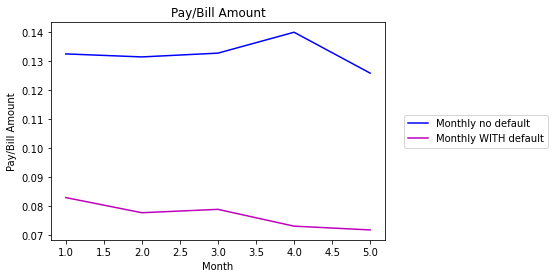

In [78]:
#Creating values
average_no_default = train.groupby(['default payment next month'])['average_pay/bill'].mean()[0]
average_yes_default= train.groupby(['default payment next month'])['average_pay/bill'].mean()[1]

no_default = [#(train.groupby(['default payment next month'])['PAY_AMT6'].mean()[0])/(train.groupby(['default payment next month'])['BILL_AMT6'].mean()[0]),
              train.groupby(['default payment next month'])['PAY_AMT5'].mean()[0]/train.groupby(['default payment next month'])['BILL_AMT6'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT4'].mean()[0]/train.groupby(['default payment next month'])['BILL_AMT5'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT3'].mean()[0]/train.groupby(['default payment next month'])['BILL_AMT4'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT2'].mean()[0]/train.groupby(['default payment next month'])['BILL_AMT3'].mean()[0],
              train.groupby(['default payment next month'])['PAY_AMT1'].mean()[0]/train.groupby(['default payment next month'])['BILL_AMT2'].mean()[0],
             ]

yes_default = [#train.groupby(['default payment next month'])['PAY_AMT6'].mean()[1]/train.groupby(['default payment next month'])['BILL_AMT6'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT5'].mean()[1]/train.groupby(['default payment next month'])['BILL_AMT6'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT4'].mean()[1]/train.groupby(['default payment next month'])['BILL_AMT5'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT3'].mean()[1]/train.groupby(['default payment next month'])['BILL_AMT4'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT2'].mean()[1]/train.groupby(['default payment next month'])['BILL_AMT3'].mean()[1],
              train.groupby(['default payment next month'])['PAY_AMT1'].mean()[1]/train.groupby(['default payment next month'])['BILL_AMT2'].mean()[1],
             ]

#Plots for those with 0 in default
#plt.plot([1,5],
#        [average_no_default, average_no_default],
#         color='b',
#         linestyle='dashed',
#         label="Avg no default"
#        )

plt.plot(range(1,6),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
#plt.plot([1,5],
#        [average_yes_default, average_yes_default],
#         color='m',
#         linestyle='dashed',
#         label="Avg WITH default"
#        )

plt.plot(range(1,6),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
#plt.plot([1,5],
#        [train['average_pay/bill'].mean(), train['average_pay/bill'].mean()],
#         color='orange',
#         label="Average"
#        )

#Labeling the graphs
plt.title("Pay/Bill Amount")
plt.xlabel("Month")
plt.ylabel("Pay/Bill Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

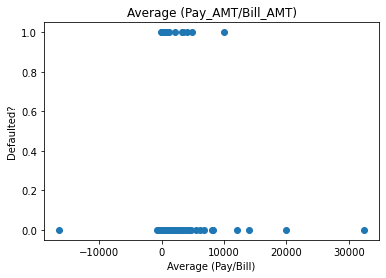

In [93]:
plt.scatter(train['average_pay/bill'],
           train['default payment next month'])

plt.title('Average (Pay_AMT/Bill_AMT)')

plt.ylabel('Defaulted?')
plt.xlabel('Average (Pay/Bill)')

plt.show()

In [122]:
#Adjustment attempt 2 for people overpaying their bills
#It seems like Pay_AMTn coorsponds to BILL_AMT(n+1)
train['average_pay/bill_2']=0
train['p1/b2_2']=0
train['p2/b3_2']=0
train['p3/b4_2']=0
train['p4/b5_2']=0
train['p5/b6_2']=0

for i in range(len(train)):
    
    B1=train.iloc[i]['BILL_AMT1']
    B2=train.iloc[i]['BILL_AMT2']
    B3=train.iloc[i]['BILL_AMT3']
    B4=train.iloc[i]['BILL_AMT4']
    B5=train.iloc[i]['BILL_AMT5']
    B6=train.iloc[i]['BILL_AMT6']
    
    P1=train.iloc[i]['PAY_AMT1']
    P2=train.iloc[i]['PAY_AMT2']
    P3=train.iloc[i]['PAY_AMT3']
    P4=train.iloc[i]['PAY_AMT4']
    P5=train.iloc[i]['PAY_AMT5']
    P6=train.iloc[i]['PAY_AMT6']
    
    
    if B2 <= 0:
        B2=1
        P1=1
    elif P1 > B2:
        P1=1
        B2=1
            
    if B3 <= 0:
        B3=1
        P2=1
    elif P2 >B3:
        P2=1
        B3=1
    
    if B4 <= 0:
        B4=1
        P3=1
    elif P3>B4:
        P3=1
        B4=1
            
    if B5 <= 0:
        B5=1
        P4=1
    elif P4 > B5:
        P4=1
        B5=1
            
    if B6 <= 0:
        B6=1
        P5=1
    elif P5>B6:
        P5=1
        B6=1

    train['average_pay/bill_2'].iloc[i]=average([P1/B2,
                  P2/B3,
                  P3/B4,
                  P4/B5,
                  P5/B6
                  ])
    train['p1/b2_2'].iloc[i]=P1/B2
    train['p2/b3_2'].iloc[i]=P2/B3
    train['p3/b4_2'].iloc[i]=P3/B4
    train['p4/b5_2'].iloc[i]=P4/B5
    train['p5/b6_2'].iloc[i]=P5/B6
    
    if P2/B3>1:
        print("OH NO!")
        print('P2: ' + str(P2))
        print('B3: '+ str(B3))
        print(P2/B3)

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/311188137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['average_pay/bill_2']=0
C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/311188137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['p1/b2_2']=0
C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/311188137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

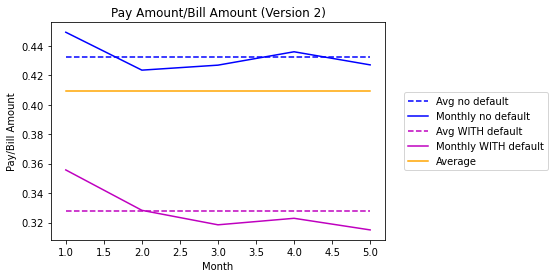

In [134]:
#Creating values
average_no_default = train.groupby(['default payment next month'])['average_pay/bill_2'].mean()[0]
average_yes_default= train.groupby(['default payment next month'])['average_pay/bill_2'].mean()[1]

no_default = [train.groupby(['default payment next month'])['p5/b6_2'].mean()[0],
              train.groupby(['default payment next month'])['p4/b5_2'].mean()[0],
              train.groupby(['default payment next month'])['p3/b4_2'].mean()[0],
              train.groupby(['default payment next month'])['p2/b3_2'].mean()[0],
              train.groupby(['default payment next month'])['p1/b2_2'].mean()[0],
             ]

yes_default = [train.groupby(['default payment next month'])['p5/b6_2'].mean()[1],
              train.groupby(['default payment next month'])['p4/b5_2'].mean()[1],
              train.groupby(['default payment next month'])['p3/b4_2'].mean()[1],
              train.groupby(['default payment next month'])['p2/b3_2'].mean()[1],
              train.groupby(['default payment next month'])['p1/b2_2'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,5],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,6),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,5],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,6),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,5],
        [train['average_pay/bill_2'].mean(), train['average_pay/bill_2'].mean()],
         color='orange',
         label="Average"
         )

#Labeling the graphs
plt.title("Pay Amount/Bill Amount (Version 2)")
plt.xlabel("Month")
plt.ylabel("Pay/Bill Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

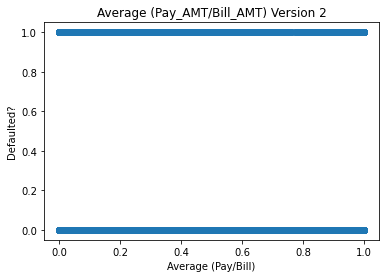

In [133]:
plt.scatter(train['average_pay/bill_2'],
           train['default payment next month'])

plt.title('Average (Pay_AMT/Bill_AMT) Version 2')

plt.ylabel('Defaulted?')
plt.xlabel('Average (Pay/Bill)')

plt.show()

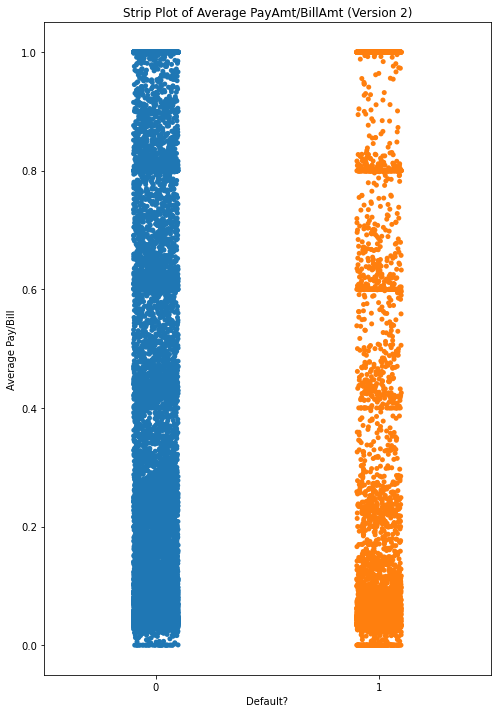

In [154]:
plt.figure(figsize=(8, 12))

sns.stripplot(data=train,
              x="default payment next month", 
              y="average_pay/bill_2"
             )

plt.title('Strip Plot of Average PayAmt/BillAmt (Version 2)')

plt.xlabel('Default?')
plt.ylabel('Average Pay/Bill')

plt.show()

Now, let's reward them with a -1 if they over/pre pay

In [136]:
#Adjustment attempt 3 for people overpaying their bills
#It seems like Pay_AMTn coorsponds to BILL_AMT(n+1)
train['average_pay/bill_3']=0
train['p1/b2_3']=0
train['p2/b3_3']=0
train['p3/b4_3']=0
train['p4/b5_3']=0
train['p5/b6_3']=0

for i in range(len(train)):
    
    B1=train.iloc[i]['BILL_AMT1']
    B2=train.iloc[i]['BILL_AMT2']
    B3=train.iloc[i]['BILL_AMT3']
    B4=train.iloc[i]['BILL_AMT4']
    B5=train.iloc[i]['BILL_AMT5']
    B6=train.iloc[i]['BILL_AMT6']
    
    P1=train.iloc[i]['PAY_AMT1']
    P2=train.iloc[i]['PAY_AMT2']
    P3=train.iloc[i]['PAY_AMT3']
    P4=train.iloc[i]['PAY_AMT4']
    P5=train.iloc[i]['PAY_AMT5']
    P6=train.iloc[i]['PAY_AMT6']
    
    
    if B2 <= 0:
        B2=1
        P1=1
    elif P1 > B2:
        P1=1
        B2=-1
            
    if B3 <= 0:
        B3=1
        P2=1
    elif P2 >B3:
        P2=1
        B3=-1
    
    if B4 <= 0:
        B4=1
        P3=1
    elif P3>B4:
        P3=1
        B4=-1
            
    if B5 <= 0:
        B5=1
        P4=1
    elif P4 > B5:
        P4=1
        B5=-1
            
    if B6 <= 0:
        B6=1
        P5=1
    elif P5>B6:
        P5=1
        B6=-1

    train['average_pay/bill_3'].iloc[i]=average([P1/B2,
                  P2/B3,
                  P3/B4,
                  P4/B5,
                  P5/B6
                  ])
    train['p1/b2_3'].iloc[i]=P1/B2
    train['p2/b3_3'].iloc[i]=P2/B3
    train['p3/b4_3'].iloc[i]=P3/B4
    train['p4/b5_3'].iloc[i]=P4/B5
    train['p5/b6_3'].iloc[i]=P5/B6
    
    if P2/B3>1:
        print("OH NO!")
        print('P2: ' + str(P2))
        print('B3: '+ str(B3))
        print(P2/B3)

C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/2345934703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['average_pay/bill_3']=0
C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/2345934703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['p1/b2_3']=0
C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/2345934703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

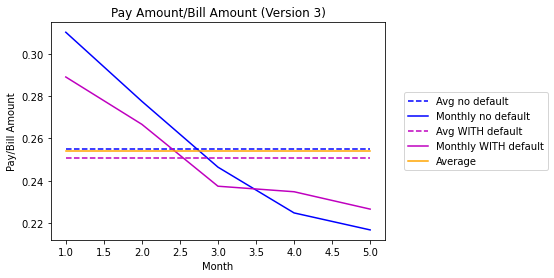

In [137]:
#Creating values
average_no_default = train.groupby(['default payment next month'])['average_pay/bill_3'].mean()[0]
average_yes_default= train.groupby(['default payment next month'])['average_pay/bill_3'].mean()[1]

no_default = [train.groupby(['default payment next month'])['p5/b6_3'].mean()[0],
              train.groupby(['default payment next month'])['p4/b5_3'].mean()[0],
              train.groupby(['default payment next month'])['p3/b4_3'].mean()[0],
              train.groupby(['default payment next month'])['p2/b3_3'].mean()[0],
              train.groupby(['default payment next month'])['p1/b2_3'].mean()[0],
             ]

yes_default = [train.groupby(['default payment next month'])['p5/b6_3'].mean()[1],
              train.groupby(['default payment next month'])['p4/b5_3'].mean()[1],
              train.groupby(['default payment next month'])['p3/b4_3'].mean()[1],
              train.groupby(['default payment next month'])['p2/b3_3'].mean()[1],
              train.groupby(['default payment next month'])['p1/b2_3'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,5],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,6),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,5],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,6),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,5],
        [train['average_pay/bill_3'].mean(), train['average_pay/bill_3'].mean()],
         color='orange',
         label="Average"
         )

#Labeling the graphs
plt.title("Pay Amount/Bill Amount (Version 3)")
plt.xlabel("Month")
plt.ylabel("Pay/Bill Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

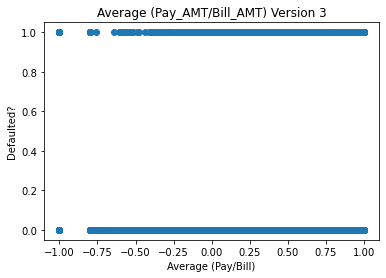

In [140]:
plt.scatter(train['average_pay/bill_3'],
           train['default payment next month'])

plt.title('Average (Pay_AMT/Bill_AMT) Version 3')

plt.ylabel('Defaulted?')
plt.xlabel('Average (Pay/Bill)')

plt.show()

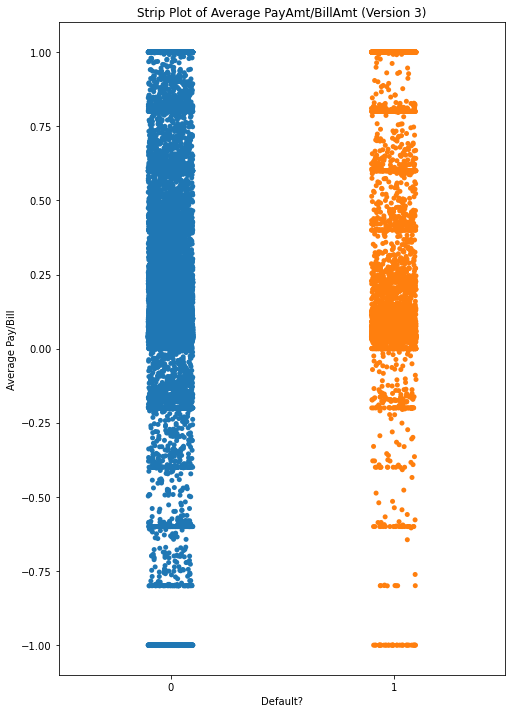

In [153]:
plt.figure(figsize=(8, 12))

sns.stripplot(data=train,
              x="default payment next month", 
              y="average_pay/bill_3"
             )



plt.title('Strip Plot of Average PayAmt/BillAmt (Version 3)')

plt.xlabel('Default?')
plt.ylabel('Average Pay/Bill')

plt.show()

### Bill/limit

In [158]:
#create new columns
newtrain=pd.DataFrame({'ave_bill/lim': train['average_bill_amt']/train['LIMIT_BAL'],
                     'bill/lim_1': train['BILL_AMT1']/train['LIMIT_BAL'],
                      'bill/lim_2': train['BILL_AMT2']/train['LIMIT_BAL'],
                      'bill/lim_3': train['BILL_AMT3']/train['LIMIT_BAL'],
                      'bill/lim_4': train['BILL_AMT4']/train['LIMIT_BAL'],
                      'bill/lim_5': train['BILL_AMT5']/train['LIMIT_BAL'],
                      'bill/lim_6': train['BILL_AMT6']/train['LIMIT_BAL'],
                      'default payment next month': train['default payment next month']})


In [16]:
newtrain.head()

,ave_bill/lim,bill/lim_1,bill/lim_2,bill/lim_3,bill/lim_4,bill/lim_5,bill/lim_6,default payment next month
28731,0.001388,0.002200,0.001100,0.001100,0.001100,0.001100,0.001725,1
23226,0.902962,0.962400,0.906400,0.989211,0.851882,0.854571,0.853307,0
2055,0.164217,0.204477,0.199662,0.193415,0.178731,0.102131,0.106885,1
15313,0.264979,0.234838,0.248363,0.261213,0.273888,0.281813,0.289762,0
18683,0.005027,0.000000,0.000000,0.000000,0.000000,0.015060,0.015105,0


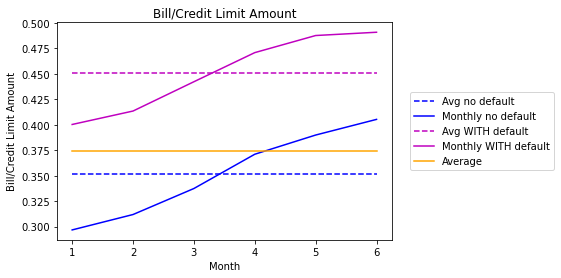

In [20]:
#Creating values
average_no_default = newtrain.groupby(['default payment next month'])['ave_bill/lim'].mean()[0]
average_yes_default= newtrain.groupby(['default payment next month'])['ave_bill/lim'].mean()[1]

no_default = [newtrain.groupby(['default payment next month'])['bill/lim_6'].mean()[0],
              newtrain.groupby(['default payment next month'])['bill/lim_5'].mean()[0],
              newtrain.groupby(['default payment next month'])['bill/lim_4'].mean()[0],
              newtrain.groupby(['default payment next month'])['bill/lim_3'].mean()[0],
              newtrain.groupby(['default payment next month'])['bill/lim_2'].mean()[0],
              newtrain.groupby(['default payment next month'])['bill/lim_1'].mean()[0],
             ]

yes_default = [newtrain.groupby(['default payment next month'])['bill/lim_6'].mean()[1],
              newtrain.groupby(['default payment next month'])['bill/lim_5'].mean()[1],
              newtrain.groupby(['default payment next month'])['bill/lim_4'].mean()[1],
              newtrain.groupby(['default payment next month'])['bill/lim_3'].mean()[1],
              newtrain.groupby(['default payment next month'])['bill/lim_2'].mean()[1],
              newtrain.groupby(['default payment next month'])['bill/lim_1'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,6],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,7),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,6],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,7),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,6],
        [newtrain['ave_bill/lim'].mean(), newtrain['ave_bill/lim'].mean()],
         color='orange',
         label="Average"
        )

#Labeling the graphs
plt.title("Bill/Credit Limit Amount")
plt.xlabel("Month")
plt.ylabel("Bill/Credit Limit Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

In [30]:
newtrain['ave_bill/lim'].max()

5.364308333333334

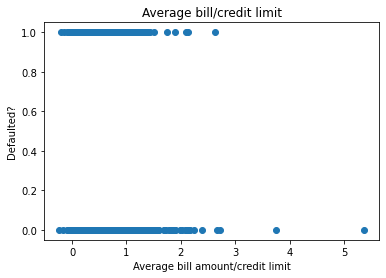

In [159]:
plt.scatter(newtrain['ave_bill/lim'],
           train['default payment next month'])

plt.title('Average bill/credit limit')
plt.ylabel('Defaulted?')
plt.xlabel('Average bill amount/credit limit')


plt.show()

I was hoping that would be logarithmic, but it's not...

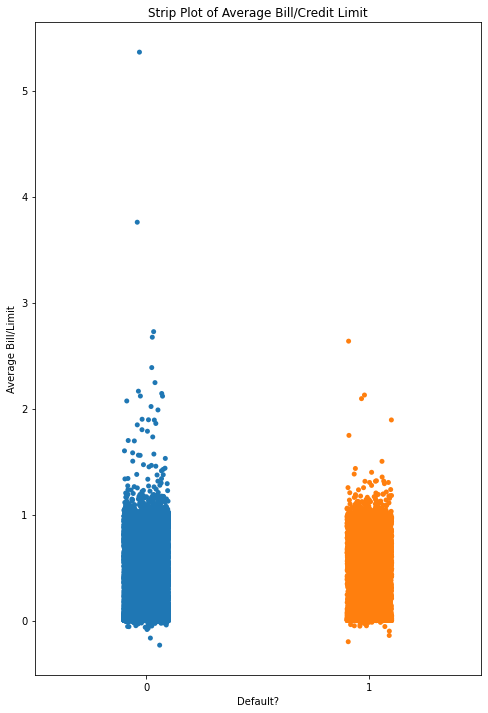

In [161]:
plt.figure(figsize=(8, 12))

sns.stripplot(data=newtrain,
              x="default payment next month", 
              y="ave_bill/lim"
             )



plt.title('Strip Plot of Average Bill/Credit Limit')

plt.xlabel('Default?')
plt.ylabel('Average Bill/Limit')

plt.show()

### Payment/Limit

In [19]:
#create new columns
newtrain2=pd.DataFrame({'ave_pay/lim': train['average_pay_amt_hist']/np.log(train['LIMIT_BAL']),
                     'pay/lim_1': train['PAY_AMT1']/np.log(train['LIMIT_BAL']),
                      'pay/lim_2': train['PAY_AMT2']/np.log(train['LIMIT_BAL']),
                      'pay/lim_3': train['PAY_AMT3']/np.log(train['LIMIT_BAL']),
                      'pay/lim_4': train['PAY_AMT4']/np.log(train['LIMIT_BAL']),
                      'pay/lim_5': train['PAY_AMT5']/np.log(train['LIMIT_BAL']),
                      'pay/lim_6': train['PAY_AMT6']/np.log(train['LIMIT_BAL']),
                      'default payment next month': train['default payment next month']})


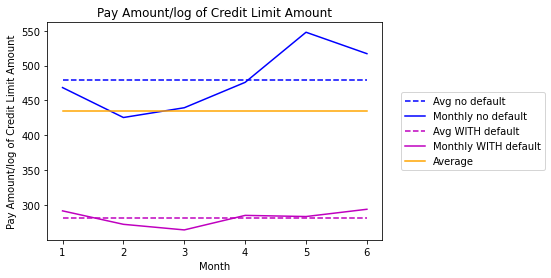

In [22]:
#Creating values
average_no_default = newtrain2.groupby(['default payment next month'])['ave_pay/lim'].mean()[0]
average_yes_default= newtrain2.groupby(['default payment next month'])['ave_pay/lim'].mean()[1]

no_default = [newtrain2.groupby(['default payment next month'])['pay/lim_6'].mean()[0],
              newtrain2.groupby(['default payment next month'])['pay/lim_5'].mean()[0],
              newtrain2.groupby(['default payment next month'])['pay/lim_4'].mean()[0],
              newtrain2.groupby(['default payment next month'])['pay/lim_3'].mean()[0],
              newtrain2.groupby(['default payment next month'])['pay/lim_2'].mean()[0],
              newtrain2.groupby(['default payment next month'])['pay/lim_1'].mean()[0],
             ]

yes_default = [newtrain2.groupby(['default payment next month'])['pay/lim_6'].mean()[1],
              newtrain2.groupby(['default payment next month'])['pay/lim_5'].mean()[1],
              newtrain2.groupby(['default payment next month'])['pay/lim_4'].mean()[1],
              newtrain2.groupby(['default payment next month'])['pay/lim_3'].mean()[1],
              newtrain2.groupby(['default payment next month'])['pay/lim_2'].mean()[1],
              newtrain2.groupby(['default payment next month'])['pay/lim_1'].mean()[1],
             ]

#Plots for those with 0 in default
plt.plot([1,6],
        [average_no_default, average_no_default],
         color='b',
         linestyle='dashed',
         label="Avg no default"
        )

plt.plot(range(1,7),
        no_default,
        color='b',
        label="Monthly no default")

#Plots for those with 1 in default
plt.plot([1,6],
        [average_yes_default, average_yes_default],
         color='m',
         linestyle='dashed',
         label="Avg WITH default"
        )

plt.plot(range(1,7),
        yes_default,
        color='m',
        label="Monthly WITH default")

#Overall average plot
plt.plot([1,6],
        [newtrain2['ave_pay/lim'].mean(), newtrain2['ave_pay/lim'].mean()],
         color='orange',
         label="Average"
        )

#Labeling the graphs
plt.title("Pay Amount/log of Credit Limit Amount")
plt.xlabel("Month")
plt.ylabel("Pay Amount/log of Credit Limit Amount")

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

plt.show()

### Age/Limit

Consider taking a logarithm?

In [6]:
import numpy as np

In [7]:
#create new columns

train['age/lim']=train['AGE']/np.log(train['LIMIT_BAL'])


C:\Users\skta2021\AppData\Local\Temp/ipykernel_31756/2130529547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age/lim']=train['AGE']/np.log(train['LIMIT_BAL'])


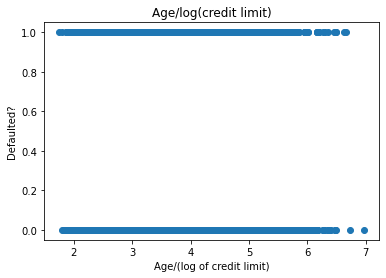

In [13]:
plt.scatter(train['age/lim'],
           (train['default payment next month'])
           )

plt.title('Age/log(credit limit)')
plt.ylabel('Defaulted?')
plt.xlabel('Age/(log of credit limit)')


plt.show()

In [14]:
train.groupby(['default payment next month'])['age/lim'].mean()

default payment next month
0    3.026000
1    3.157974
Name: age/lim, dtype: float64

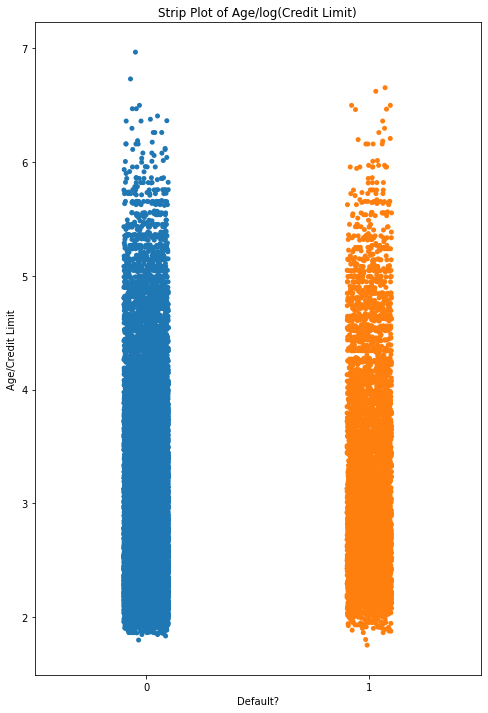

In [162]:
plt.figure(figsize=(8, 12))

sns.stripplot(data=train,
              x="default payment next month", 
              y="age/lim"
             )



plt.title('Strip Plot of Age/log(Credit Limit)')

plt.xlabel('Default?')
plt.ylabel('Age/Credit Limit')

plt.show()